# Exercice 2 : la courbe de Von Koch 



L'objectif de cet exercice est de vous faire coder l'une des fractales les plus célèbres : la courbe de Von Koch, qui vous a été présenté la première semaine dans les exercices, et de vous faire observer, grâce à un zoom sur votre figure (pour un grand nombre d'itérations) l'autosimilarité de cet objet.

 

Une brève illustration des trois premières itérations du flocon :


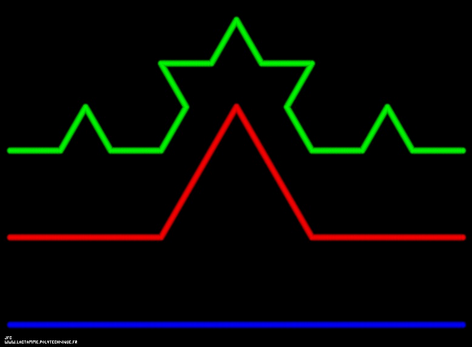

La totalité de l'exercice se fera dans ce notebook. Afin d'effectuer nos tracés, nous allons utiliser le module Turtle dont la documentation se trouve à l'adresse suivante : https://docs.python.org/3.3/library/turtle.html?highlight=turtle les fonctions nécessaires pour ce TP seront cependant expliquées par la suite.

## Fonctionnement du programme

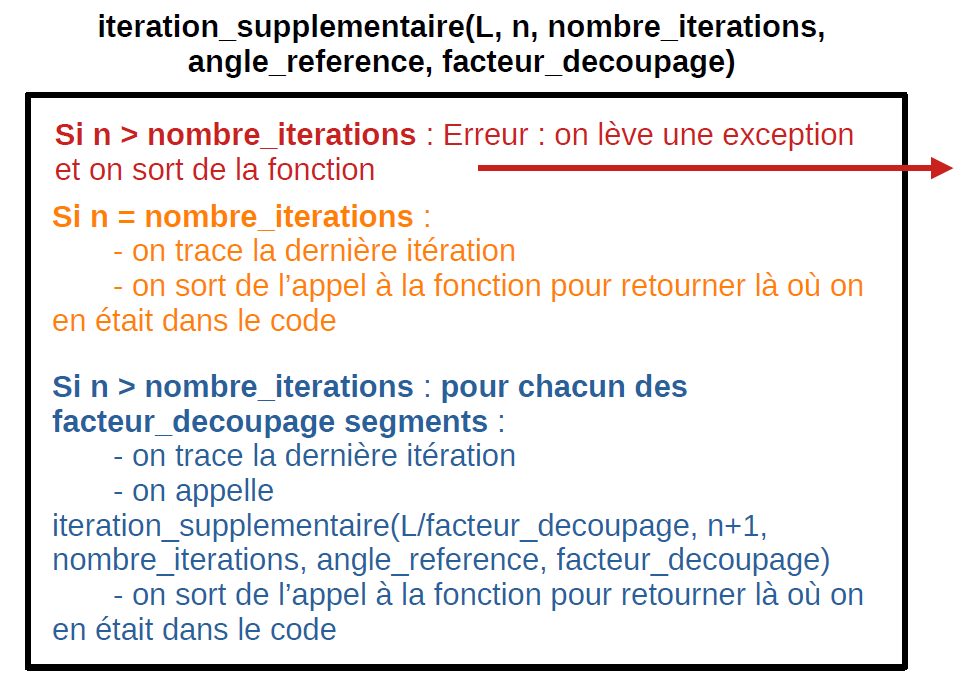


 ## Initialisation du programme


Importons tout d'abord les librairies nécessaires.

In [ ]:
# On commence par importer le module Turtle et le module time qui 
# nous permettra de mesurer le temps et de définir des temps d'attente
import time
from turtle import *

Afin de pouvoir tracer le flocon, nous devons configurer l'affichage du tracé. Plus d'informations sont disponibles dans la documentation du module.

In [ ]:
# Ci dessous : la largeur puis la hauteur de l'image en nombre de
# pixels, la largeur en coordonnées de la figure et la marge
# blanche laissée sur les bords latéraux et inférieurs de la figure.
nb_pixels_largeur = 640 
nb_pixels_hauteur = 200
largeur_figure = 300
marge = 5

setup(nb_pixels_largeur, nb_pixels_hauteur)
setworldcoordinates(-marge, -marge,  largeur_figure + marge, nb_pixels_hauteur / nb_pixels_largeur * largeur_figure)
# Les deux premiers arguments sont les coordonnées du point en bas
# à gauche de la figure et les deux derniers, celles du coin en haut
# à droite de la figure. Le curseur part de l'origine du repère.

## 1- Itération supplémentaire

Tout d'abord, il nous faut fixer le nombre d'itération que l'on souhaite obtenir ainsi que différents paramètres géométriques.

In [ ]:
# On fixe le nombre d'itération que l'on souhaite obtenir.
# Turte est relativement lent, il est donc conseillé de commencer
# avec un nombre d'itération inférieur à 10 pour constater si
# le code fonctionne bien.

nombre_iterations = 3
L = 100
angle_reference = 60
# En degré. Ici l'angle d'un triangle équilatéral.
facteur_decoupage = 3
# Rapport entre la longueur du segment d'origine et les sous-segments
# de l'itération suivante.

 ### Question a
 
 La fonction iteration_supplementaire comporte cinq arguments : 

- L qui est la longueur du segment que l'on souhaite "itérer"

- n le numéro de l'itération que l'on est en train de faire

- nombre_iterations est le nombre d'itérations que l'on compte faire au total

- angle_reference qui correspond à l’angle en degré du triangle isocèle formé à chaque itération (comme nous souhaitons un triangle équilatéral, il vaut 60) 

- facteur découpage qui correspond au rapport entre le segment à découper et les sous-segments de l’itération suivante

 

Nous n'allons pour l'instant pas nous préoccuper de n et considérer que nous sommes à la dernière itération à effectuer. Nous devons donc tracer le "pic" avec Turtle. Turtle fonctionne comme une voiture télécommandée : vous dirigez un curseur en lui disant d'aller tout droit, de tourner à gauche ou de tourner à droite. Les commandes sont les suivantes :

    forward(long)fait aller tout droit sur la longueur long
    left(angle_gauche) fait tourner à gauche (sur place d'un angle angle_gauche indiqué en degrés).
    right(angle_droite) fait la même chose à droite.

Remplissez la fonction en codant simplement les instructions permettant de faire la dernière itération, en considérant que votre curseur est déjà dans la bonne direction.

In [ ]:
def iteration_supplementaire(L, n, nombre_iterations, angle_reference, facteur_decoupage):
    """ 
    L est la longueur du segment que l'on souhaite  'itérer'.
    n est le nombre d'itération auquel on est.
    nombre_iterations est le nombre total d'itération que l'on
    souhaite effectuer.
    """
    # Assurons-nous d'abord que l'on a pas dépassé le nombre maximal d'itérations. 
    # Si tel est le cas, une exception doit être levée pour que le programme ne tourne pas indéfiniment.
    if n > nombre_iterations :
        print(" Attention : n > nombre_iterations ")
        raise ValueError 
    else :
        # Ceci est la dernière itération et correspond donc à
        # la question 1-a. La question 1-b consiste à ajouter le
        # if ci-dessus.
        forward(L) 
        left(angle_reference)
        forward(L)
        right(2 * angle_reference)
        forward(L)
        left(angle_reference)
        forward(L)

Testons la fonction

ATTENTION : Si l'exception "Terminator" apparaît, n'en tenez pas compte et relancez la cellule.

In [ ]:
n = 1

# paramétrisation de la fenêtre
setup(nb_pixels_largeur, nb_pixels_hauteur)
setworldcoordinates(-marge, -marge,  largeur_figure + marge, nb_pixels_hauteur / nb_pixels_largeur * largeur_figure)

# tracé
begin_fill()
iteration_supplementaire(L, n, nombre_iterations, angle_reference, facteur_decoupage)
end_fill()

# fermeture de la fenêtre après trois secondes supplémentaires d'affichage
time.sleep(3)
bye()

### Question b 

Ce que nous avons codé à la question précédente ne correspond qu'au travail à faire à la dernière itération donc au cas où le numéro d'itération (que l'on avait pas pris en compte) est égal au nombre maximal d'itération.

Réécrivez votre code pour que la partie codé à la question 1-a ne soit exécutée que dans ce cas.

In [ ]:
def iteration_supplementaire(L, n, nombre_iterations, angle_reference, facteur_decoupage):
    """ 
    L est la longueur du segment que l'on souhaite  'itérer'.
    n est le nombre d'itération auquel on est.
    nombre_iterations est le nombre total d'itération que l'on
    souhaite effectuer.
    """
    # Assurons-nous d'abord que l'on a pas dépassé le nombre maximal d'itérations. 
    # Si tel est le cas, une exception doit être levée pour que le programme ne tourne pas indéfiniment.
    if n > nombre_iterations :
        print(" Attention : n > nombre_iterations ")
        raise ValueError 
    elif n == nombre_iterations:
        # Ceci est la dernière itération et correspond donc à
        # la question 1-a. La question 1-b consiste à ajouter le
        # if ci-dessus.
        forward(L) 
        left(angle_reference)
        forward(L)
        right((facteur_decoupage - 1) * angle_reference)
        forward(L)
        left(angle_reference)
        forward(L)

Testons de nouveau la fonction. Attention ! Comme celle-ci n'est pas terminée, il faut veiller à ce que n = nombre_iterations, sinon la fonction tournera indéfiniment. 

Si cela venait à se produire, il faudrait interrompre le programme.

ATTENTION : Si l'exception "Terminator" apparaît, n'en tenez pas compte et relancez la cellule.

In [ ]:
n = 1
nombre_iterations = n

# paramétrisation de la fenêtre
setup(nb_pixels_largeur, nb_pixels_hauteur)
setworldcoordinates(-marge, -marge,  largeur_figure + marge, nb_pixels_hauteur / nb_pixels_largeur * largeur_figure)

# tracé
begin_fill()
iteration_supplementaire(L, n, nombre_iterations, angle_reference, facteur_decoupage)
end_fill()

# fermeture de la fenêtre après trois secondes supplémentaires d'affichage
time.sleep(3)
bye()

### Question c
Occupons nous maintenant du cas où n < nombre_itérations. C'est ici que nous utilisons le concept de récursivité : lorsque vous souhaitez tracer le flocon, vous imaginez les segments de l'itération en cours et sur chacun de ces segments, vous effectuez l'itération suivante (et donc si ce n'est pas la dernière, vous répétez ce processus). Une itération intermédiaire ne consiste donc qu'à orienter les itérations suivantes dans la bonne direction et à définir jusqu'où le tracé doit aller pour remplacer le segment virtuel de cette itération.


In [ ]:
# Copier coller et compléter ici la fonction iteration_supplementaire

def iteration_supplementaire(L, n, nombre_iterations, angle_reference, facteur_decoupage):
    """ 
    L est la longueur du segment que l'on souhaite  'itérer'.
    n est le nombre d'itération auquel on est.
    nombre_iterations est le nombre total d'itération que l'on
    souhaite effectuer.
    """
    # Assurons-nous d'abord que l'on a pas dépassé le nombre maximal d'itérations. 
    # Si tel est le cas, une exception doit être levée pour que le programme ne tourne pas indéfiniment.
    if n > nombre_iterations :
        print(" Attention : n > nombre_iterations ")
        raise ValueError 
    elif n == nombre_iterations:
        # Ceci est la dernière itération et correspond donc à
        # la question 1-a. La question 1-b consiste à ajouter le
        # if ci-dessus.
        forward(L) 
        left(angle_reference)
        forward(L)
        right(2 * angle_reference)
        forward(L)
        left(angle_reference)
        forward(L)
    else :
        # On conserve les "virages" et on remplace les segments par
        # l'itération suivante. Ceci correspond à la question 1-c.
        iteration_supplementaire(L/facteur_decoupage, n + 1, nombre_iterations, angle_reference, facteur_decoupage)
        left(angle_reference)
        iteration_supplementaire(L/facteur_decoupage, n + 1, nombre_iterations, angle_reference, facteur_decoupage)
        right(2 * angle_reference)
        iteration_supplementaire(L/facteur_decoupage, n + 1, nombre_iterations, angle_reference, facteur_decoupage)
        left(angle_reference)
        iteration_supplementaire(L/facteur_decoupage, n + 1, nombre_iterations, angle_reference, facteur_decoupage)

Testons une fois de plus la fonction

ATTENTION : Si l'exception "Terminator" apparaît, n'en tenez pas compte et relancez la cellule.

In [ ]:
n = 1
nombre_iterations = 3

# paramétrisation de la fenêtre
setup(nb_pixels_largeur, nb_pixels_hauteur)
setworldcoordinates(-marge, -marge,  largeur_figure + marge, nb_pixels_hauteur / nb_pixels_largeur * largeur_figure)

# tracé
begin_fill()
iteration_supplementaire(L, n, nombre_iterations, angle_reference, facteur_decoupage)
end_fill()

# fermeture de la fenêtre après trois secondes supplémentaires d'affichage
time.sleep(3)
bye()

### Voyons ce que cela donne !
Nous pouvons maintenant tester notre code en exécutant le script ci-dessous

In [ ]:
n = 1 
debut = time.time() # On note la date de début du tracé
nombre_iterations = 3
#-------On trace--------------------------------
setup(nb_pixels_largeur, nb_pixels_hauteur)
setworldcoordinates(-marge, -marge,  largeur_figure + marge, nb_pixels_hauteur / nb_pixels_largeur * largeur_figure)
begin_fill()
iteration_supplementaire(L, n, nombre_iterations, angle_reference, facteur_decoupage)
end_fill()
#-----------------------------------------------

fin = time.time() # On note la date de fin de tracé
# On ferme la fenêtre d'affichage
time.sleep(3)
bye()

# On affiche le temps mis pour tracer
print("Le temps, en seconde, mis pour tracer la fractale est : ") 
print(fin - debut)

Voici la figure obtenue pour nombre_iterations = 5. On observe clairement que la courbe est autosimilaire.
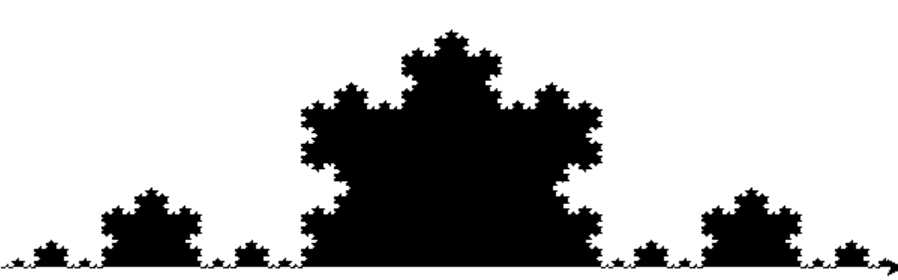

## 2- Temps d'exécution 
Le temps mis par l'algorithme s'affiche à chaque tracé. Changez le nombre d'itérations et regardez comment le temps varie en fonction de celui-ci. À votre avis, cette évolution est-elle linéaire ? quadratique (c’est à dire proportionnel au carré du nombre d’itérations) ? exponentielle ?

ATTENTION : Si l'exception "Terminator" apparaît, n'en tenez pas compte et relancez la cellule.

#### Réponse
Le temps mis par l’algorithme est exponentiel en fonction du nombre d’itérations (la fonction exponentielle est très fortement croissante.). En effet, chaque itération ajoute 3 avancées du curseur de Turtle ou 3 appel à l’itération suivante et trois rotation du curseur par étape. On peut donc considérer que chaque itération se fait à temps constant + les éventuels appels aux itérations suivantes. Le temps de calcul est donc à peu de chose près proportionnel au nombre d’appels à la fonction iteration_supplementaire. Regardons ce qu’il se passe si n = 3.

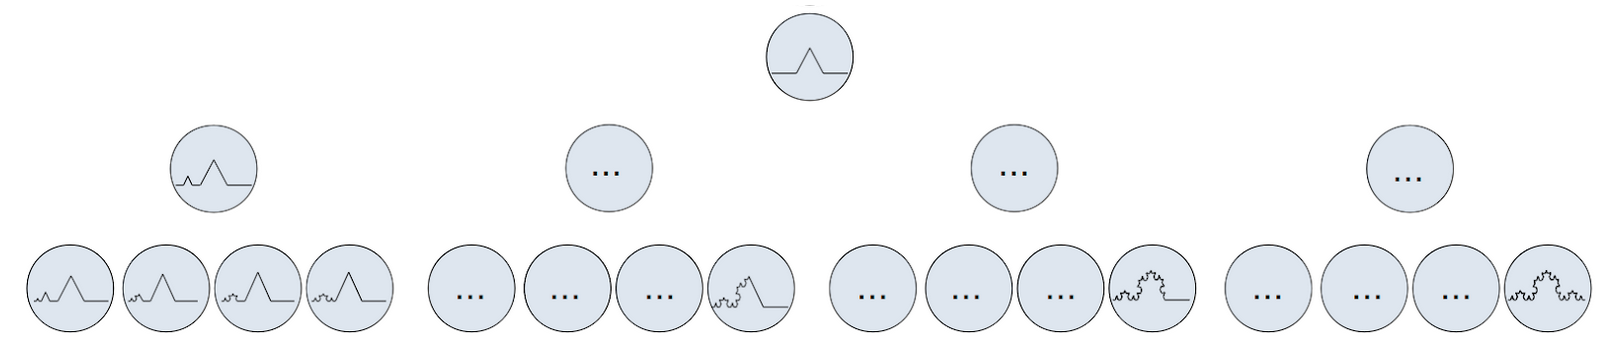

La première ligne correspond à l’itération 1 qui représente le premier appel à la fonction. Cette ligne compte donc 4⁰ appel et génère 4 appels, un pour chaque segments. La ligne suivante compte donc 4¹ appels. Chacun de ces appels engendre 4 appels, la ligne suivante compte donc 4² appels. Il y a donc au total 4⁰ + 4¹ + 4² = 1 - 4³1 - 4=2553 =85appels (cette formule est celle de la somme d’une suite géométrique). À une constante près, le nombre d’appels est donc proportionnel à 4³ pour 3 itérations… On pourrait refaire le même calcul quel que soit le nombre d’itérations et on trouverait toujours un nombre d’appels proportionnel à 4 puissance le nombre d’itération. Comme on considère que le temps passé est proportionnel au nombre d’appels, on dit alors que le temps de calcul est exponentiel en fonction du nombre d’itérations.